In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

#import sys
#sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\sc_AHM.py'>

# Complete Calculation and presentation of
- selfconsistent parameters
- total and conventional superfluid weigth
- unit cell with properties
- bandstructure and DOS
- BKT Temperature
# for the dDSL lattice


In [2]:
N=2
m = -0.5
n = N**2-N+1
lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.dDSLmodel(N=N, delta=np.ones(n), T=0, U=np.ones(n), nu=n, ns=np.ones(n), mu=np.ones(n))

In [4]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=300, alpha=0.3, g=1e-4)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


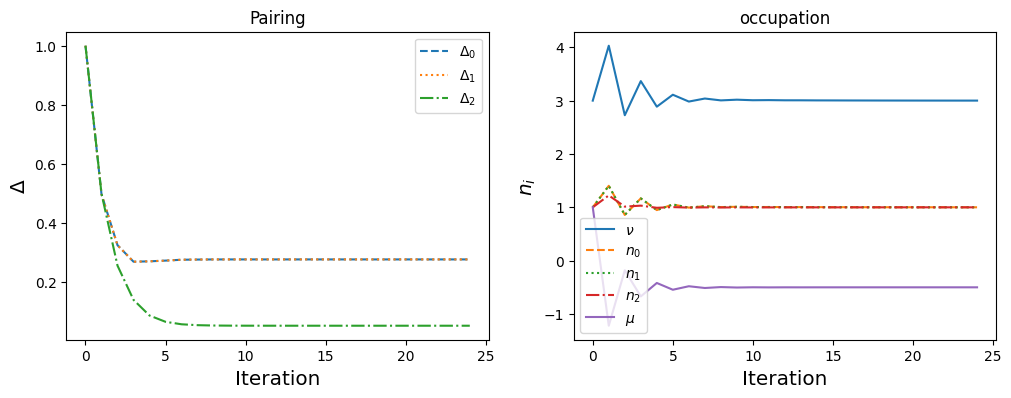

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].set_title('Pairing')
axes[1].set_title('occupation')

axes[0].set_xlabel('Iteration', size='x-large')
axes[0].set_ylabel(r'$\Delta$', size='x-large')
#axes[0].set_xticks(size='x-large')
#axes[0].set_yticks(size='x-large')

axes[1].set_xlabel('Iteration', size='x-large')
axes[1].set_ylabel(r'$n_i$', size='x-large')
#axes[1].set_xticks(size='x-large')
#axes[1].set_yticks(size='x-large')

colors=['dashed', 'dotted', 'dashdot']

for i,d in enumerate(dels):
    ax0 = axes[0].plot(np.arange(len(dels[0])), np.real(d), linestyle=colors[i%3], label = f'$\Delta_{i}$')

s1 = np.sum(nus, axis=0)

axes[1].plot(np.arange(len(s1)), s1, label = r'$\nu$')
for i,n in enumerate(nus):
    ax1 = axes[1].plot(np.arange(len(s1)),nus[i],linestyle=colors[i%3], label=f'$n_{i}$')
axes[1].plot(np.arange(len(s1)),mus[0], label=r'$\mu$')

   
axes[0].legend()
axes[1].legend()
plt.show()

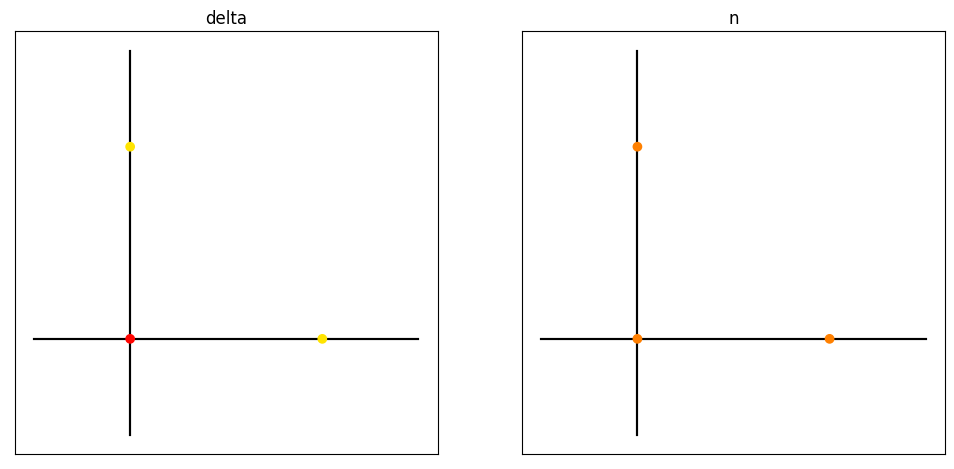

In [13]:
fig, axes = plt.subplots(ncols = 2, figsize=(12,9))

lattices = [lattice.dDiagonallyStripedLattice(N=N)]

labels = [f'delta', f'n']
props = [ham.delta, ham.ns]

g = []
for i, lats in enumerate(lattices):
    for j, p in enumerate(props):
        
        field = p#ham.lat.striped_props(p)#[p[ham.lat.map_diag[i]] for i in range(ham.n)]
        s = lat.plot_nn(axes[j], field=np.real(field), cmap='autumn')
        axes[j].set_title(labels[j])

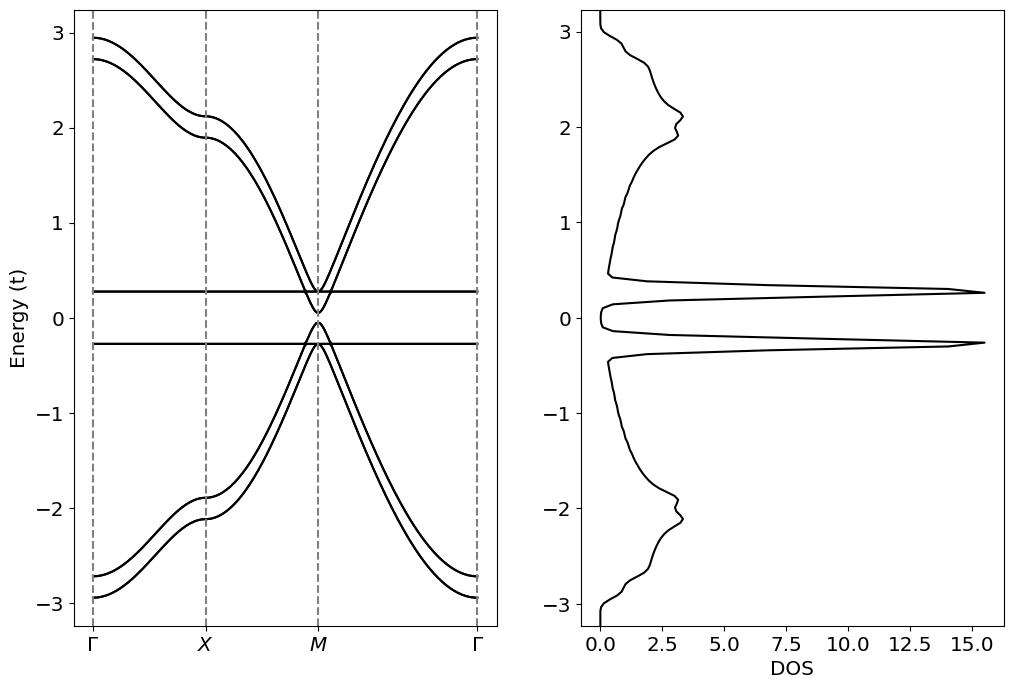

In [14]:
H = ham.get_HBdG()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
# Create two subplots and unpack the output array immediately

axes[0] = plotting.plot_bands(H, hsp_path='GXMG', ax=axes[0])
axes[1] = plotting.plot_DOS(H, sig=0.05, elim = (-4, 4), ax=axes[1], ylabel=None)

In [28]:
s=41
sfw, term = sf.SFW(ham,s)
sf.detSFW(ham,s)

(array([[ 1.90336595e-01+2.04006624e-34j, -4.79377314e-18+5.20640300e-34j],
        [-4.79377314e-18+5.20640300e-34j,  1.90336595e-01+2.04006624e-34j]]),
 (0.19033659545561815+2.0400662369241597e-34j))

In [16]:
tens, dcsfw = sf.det_convSFW(ham, nk=41)
dcsfw

(0.023374744977168457-4.823138469444687e-18j)

In [25]:
s=41

In [26]:
convsfw, term = sf.SFWconv(ham, nk=41)
convsfw

(0.02337474497716846-4.8231384694446876e-18j)

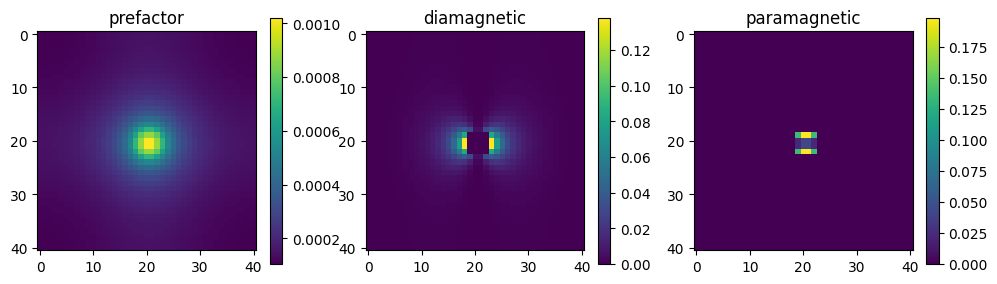

In [29]:
ep = int(2**2/2)+2 # energy pair 
pfgrid = term[:,0,ep].reshape(s,s)
diam = term[:,1,ep].reshape(s,s)
param = term[:,2,ep].reshape(s,s)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,16))
axes[0].set_title('prefactor')
axes[1].set_title('diamagnetic')
axes[2].set_title('paramagnetic')
ax0 = axes[0].imshow(np.abs(pfgrid))
ax1 = axes[1].imshow(np.abs(diam))
ax2 = axes[2].imshow(np.abs(param))
fig.colorbar(ax0, shrink=0.2)
fig.colorbar(ax1, shrink=0.2)
fig.colorbar(ax2, shrink=0.2)
plt.show()

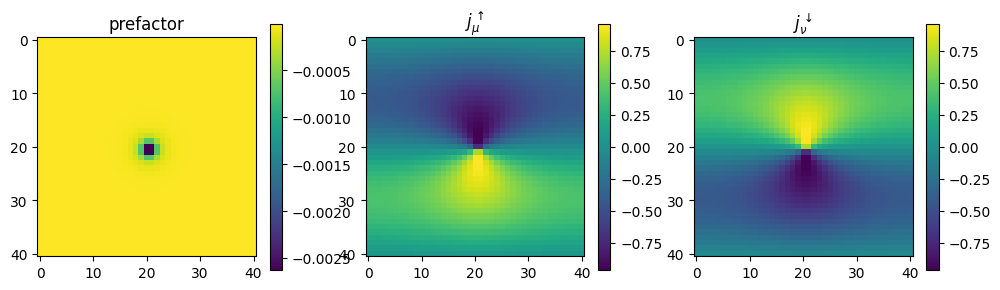

In [19]:
ep = 6 # energy pair 
s=41
pfgrid = term[:,0,ep].reshape(s,s)
upcurr = term[:,1,ep].reshape(s,s)
downcurr = term[:,2,ep].reshape(s,s)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,16))
axes[0].set_title('prefactor')
axes[1].set_title(r'$j^{\uparrow}_{\mu}$')
axes[2].set_title(r'$j^{\downarrow}_{\nu}$')
ax0 = axes[0].imshow(np.real(pfgrid))
ax1 = axes[1].imshow(np.real(upcurr))
ax2 = axes[2].imshow(np.real(downcurr))
fig.colorbar(ax0, shrink=0.2)
fig.colorbar(ax1, shrink=0.2)
fig.colorbar(ax2, shrink=0.2)
plt.show()

In [20]:
H = ham.get_HBdG()
k=np.linspace(0,2*np.pi,41)
E2 = np.zeros((ham.dim,41*41))
c = 0
for kx in k:
    for ky in k:
        E2[:,c] = np.linalg.eigh(H(kx,ky))[0]
        c+=1


s1=np.shape(E2)[0]
E2=E2.reshape(ham.dim,41,41)

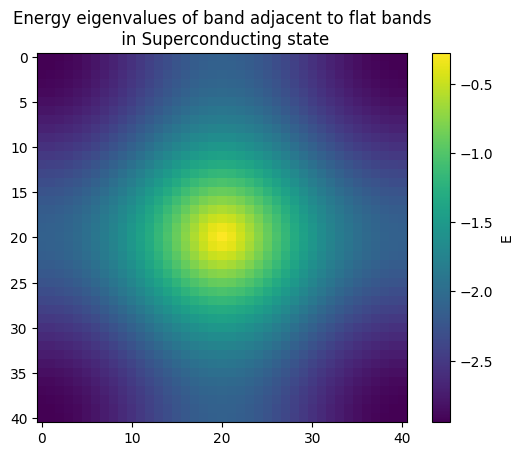

In [21]:
plt.title('Energy eigenvalues of band adjacent to flat bands\n in Superconducting state')
plt.imshow(E2[1,:,:])
plt.colorbar(label='E')